In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd

features_df = pd.read_csv('/content/drive/My Drive/MLproject/train.csv',index_col='tripid')
features_df = features_df.dropna()
features_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,correct
213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,correct
213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,correct


# Basic Preprocessing


In [3]:
features_df['label'] = features_df['label'].replace("correct", 1)
features_df['label'] = features_df['label'].replace("incorrect", 0)

del features_df['pickup_time']
del features_df['drop_time']
label_df = features_df['label']
del features_df['label']

In [4]:
X_train, X_eval, y_train, y_eval = train_test_split(features_df,label_df,test_size=0.2,shuffle=True,stratify=label_df,random_state=6)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)

# Model Setup


In [14]:
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras import regularizers
                    
model = Sequential()
model.add(Dense(128, input_dim=10,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu",kernel_regularizer=regularizers.l2()))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])   

In [15]:
history = model.fit(X_train, y_train, epochs=60, batch_size=32, verbose=1, validation_data=(X_eval, y_eval))

Train on 13574 samples, validate on 3394 samples
Epoch 1/60
13574/13574 [==============================] - 1s 67us/step - loss: 0.5634 - accuracy: 0.9078 - val_loss: 0.3309 - val_accuracy: 0.9116
Epoch 2/60
13574/13574 [==============================] - 1s 53us/step - loss: 0.3236 - accuracy: 0.9105 - val_loss: 0.2953 - val_accuracy: 0.9113
Epoch 3/60
13574/13574 [==============================] - 1s 52us/step - loss: 0.2965 - accuracy: 0.9120 - val_loss: 0.2803 - val_accuracy: 0.9140
Epoch 4/60
13574/13574 [==============================] - 1s 53us/step - loss: 0.2838 - accuracy: 0.9133 - val_loss: 0.2720 - val_accuracy: 0.9169
Epoch 5/60
13574/13574 [==============================] - 1s 55us/step - loss: 0.2745 - accuracy: 0.9143 - val_loss: 0.2629 - val_accuracy: 0.9196
Epoch 6/60
13574/13574 [==============================] - 1s 52us/step - loss: 0.2655 - accuracy: 0.9171 - val_loss: 0.2493 - val_accuracy: 0.9231
Epoch 7/60
13574/13574 [==============================] - 1s 54us/ste

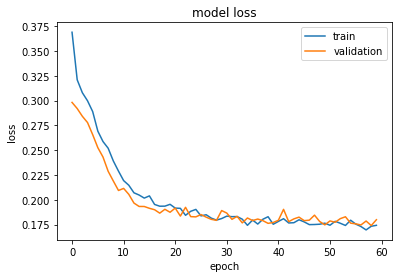

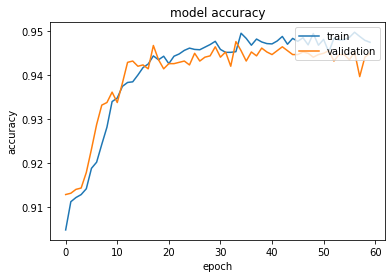

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Visualize accuracy (mean squared error)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Model Evaluation


In [ ]:
prediction = model.predict_classes(X_eval)
f1_score(y_eval, prediction, average='macro')

0.8317574146224513

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_eval,prediction)

array([[ 176,  129],
       [  30, 3059]])

In [ ]:
from keras.models import load_model
 
# load model
model = load_model('/content/drive/My Drive/MLproject/model3.h5')

# Predictions for Test data


In [ ]:
test_df = pd.read_csv('/content/drive/My Drive/MLproject/test.csv')

del test_df['drop_time']
del test_df['pickup_time']
del test_df['tripid']

In [ ]:
X_test = scaler.transform(test_df)
predictions = model.predict_classes(X_test)

submission_df = pd.read_csv('/content/drive/My Drive/MLproject/sample_submission.csv')
submission_df['prediction'] = predictions
submission_df.to_csv('/content/drive/My Drive/MLproject/my_submission_xg_boost.csv',index=False)